# Crop_Recommendation_System

### importing libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [40]:
data=pd.read_csv('Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


##### N - ratio of Nitrogen content in soil
##### P - ratio of Phosphorous content in soil
##### K - ratio of Potassium content in soil
##### temperature - temperature in degree Celsius
##### humidity - relative humidity in %
##### ph - ph value of the soil
##### rainfall - rainfall in mm

In [41]:
data.shape

(2200, 8)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [43]:
data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [44]:
data.duplicated().sum()

np.int64(0)

In [45]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Exploring Data

In [46]:
corr=data.select_dtypes(include='number').corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [47]:
data['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

### Univariate Analysis

In [48]:
num_cols=data.select_dtypes(include='number').columns
num_cols

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

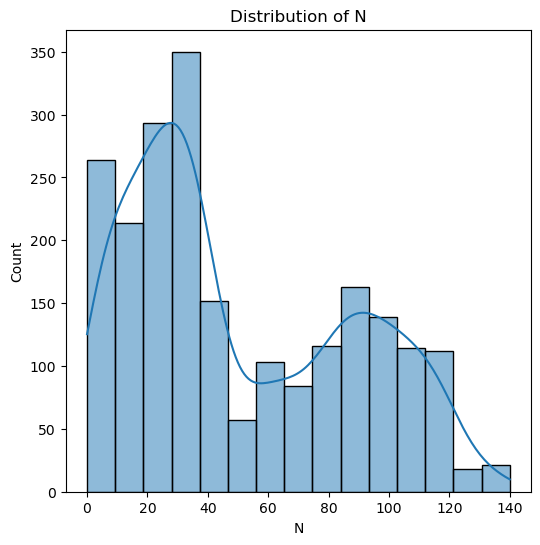

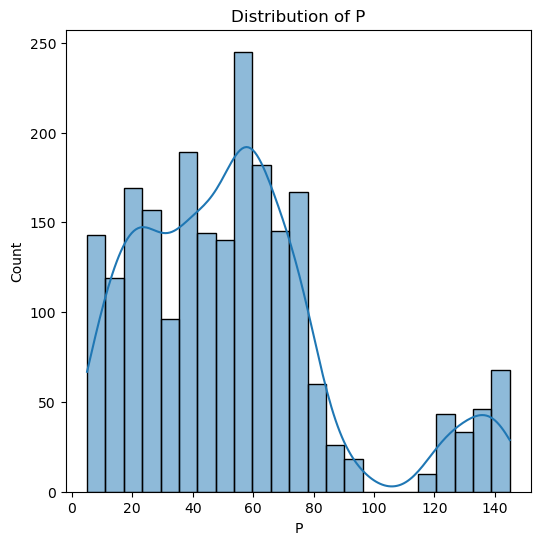

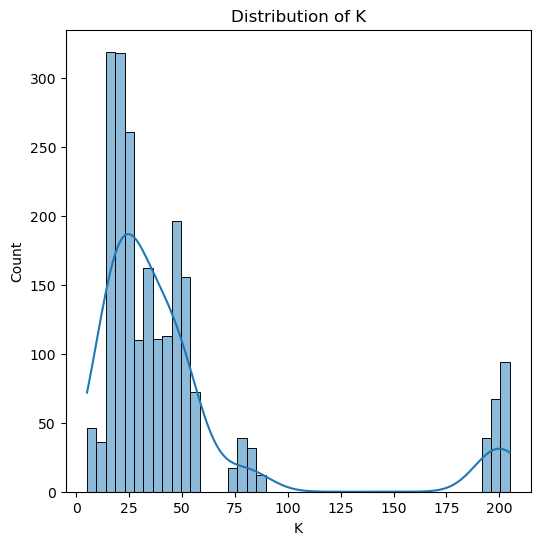

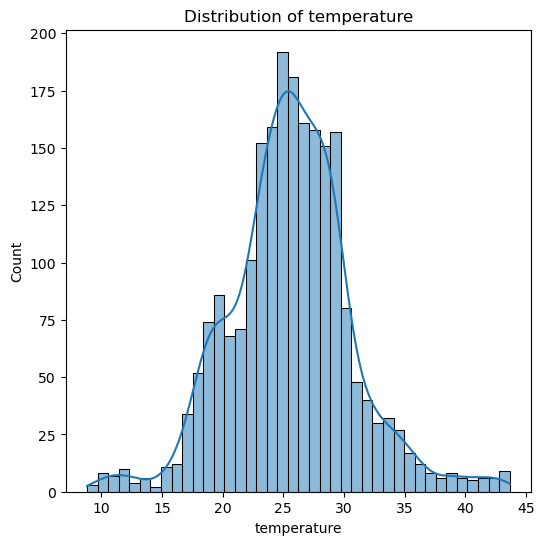

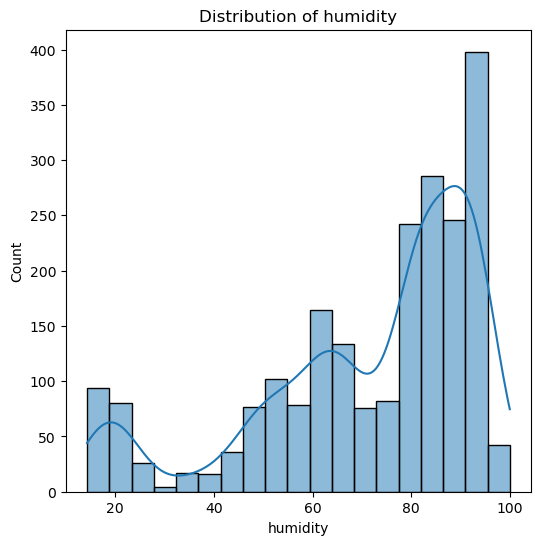

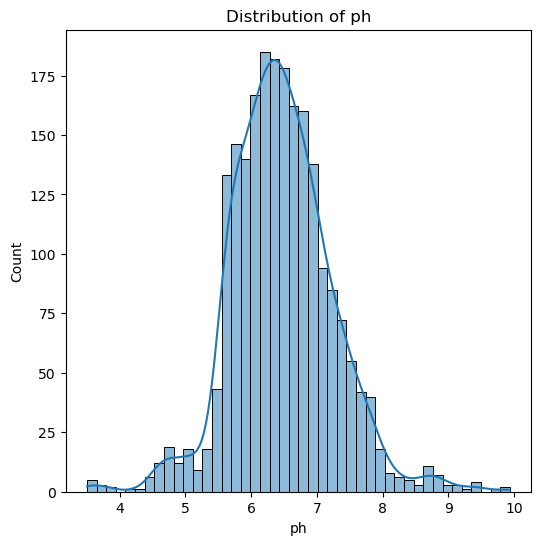

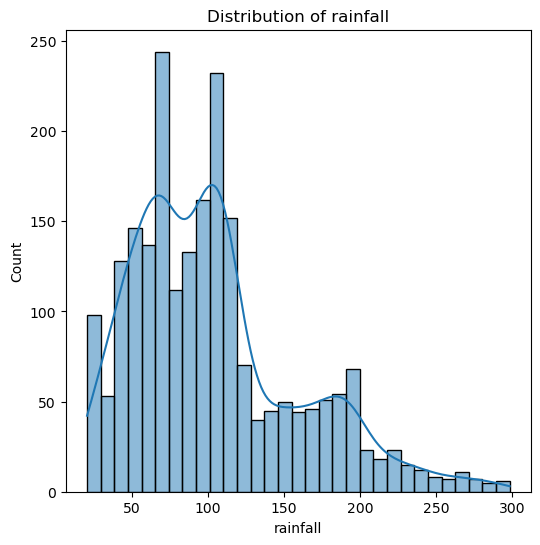

In [49]:
for i in num_cols:
    plt.figure(figsize=(6,6))
    sns.histplot(data[i],kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()



<Axes: ylabel='label'>

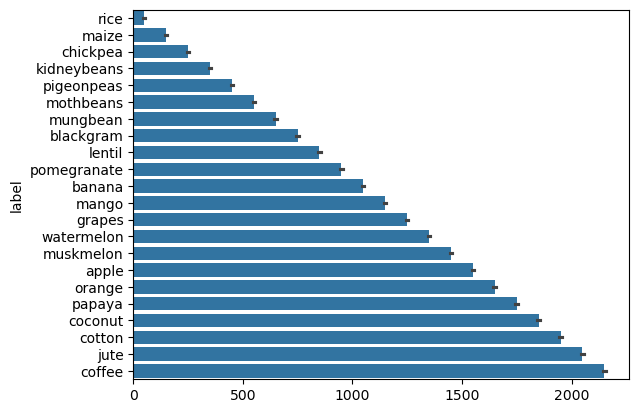

In [50]:
sns.barplot(data=data['label'])

### Bivariate Analysis

<Axes: >

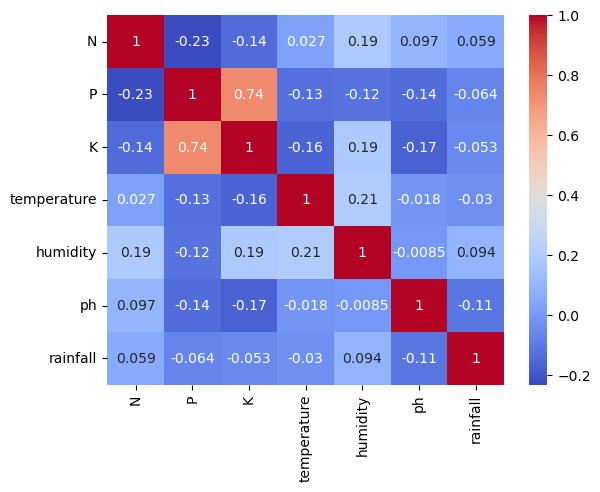

In [51]:
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

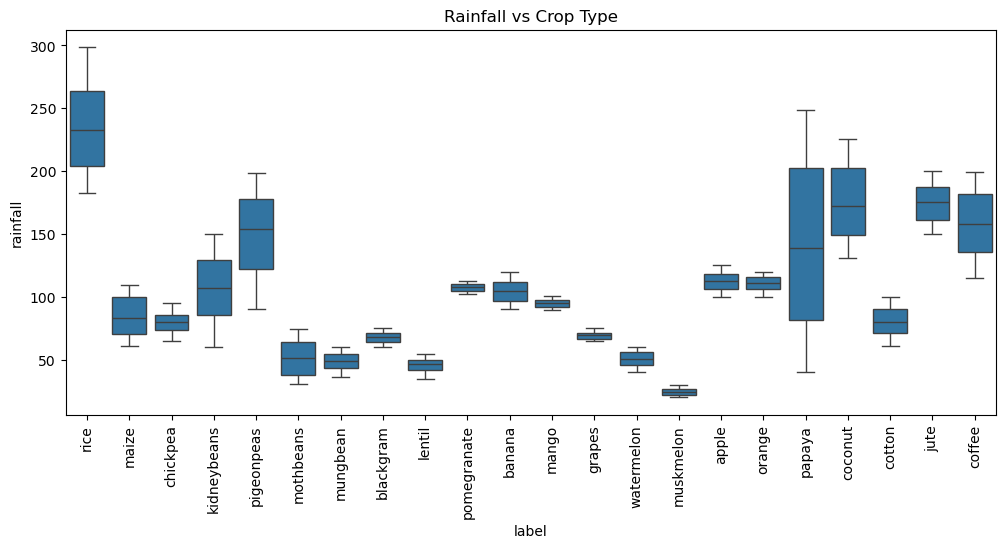

In [52]:
plt.figure(figsize=(12,5))
sns.boxplot(x='label', y='rainfall', data=data)
plt.xticks(rotation=90)
plt.title("Rainfall vs Crop Type")
plt.show()


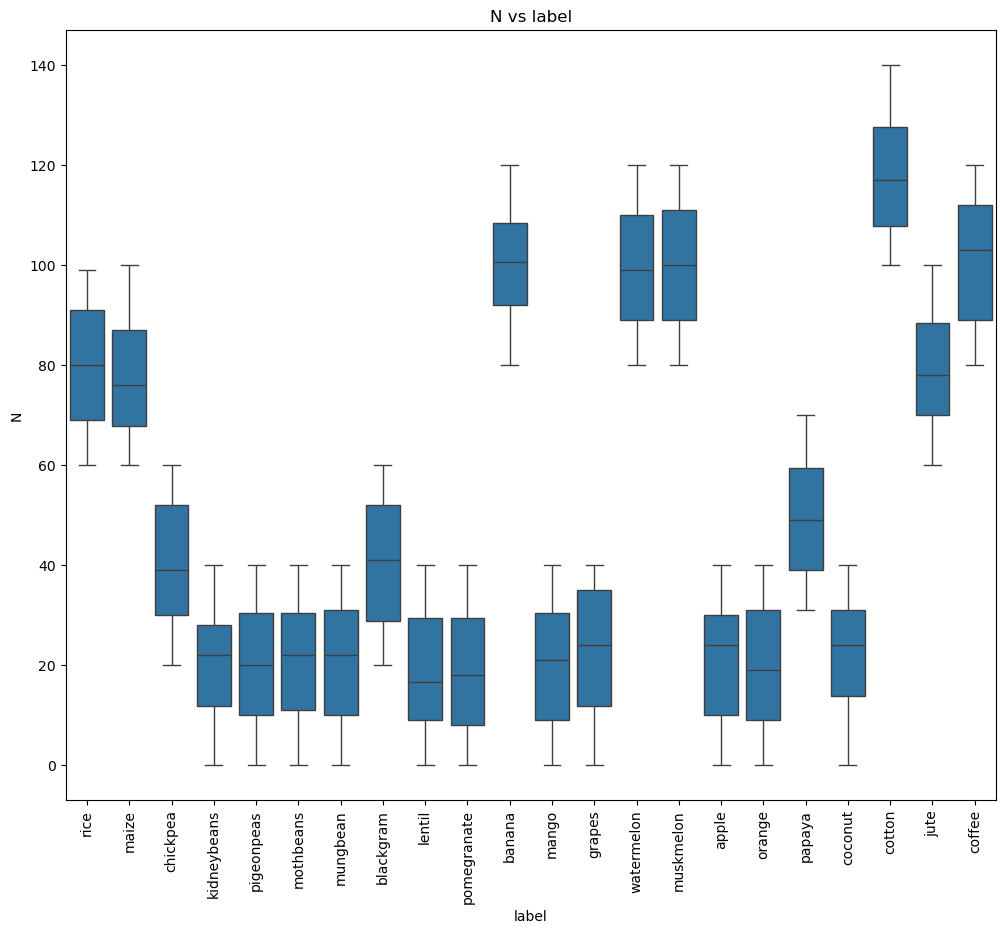

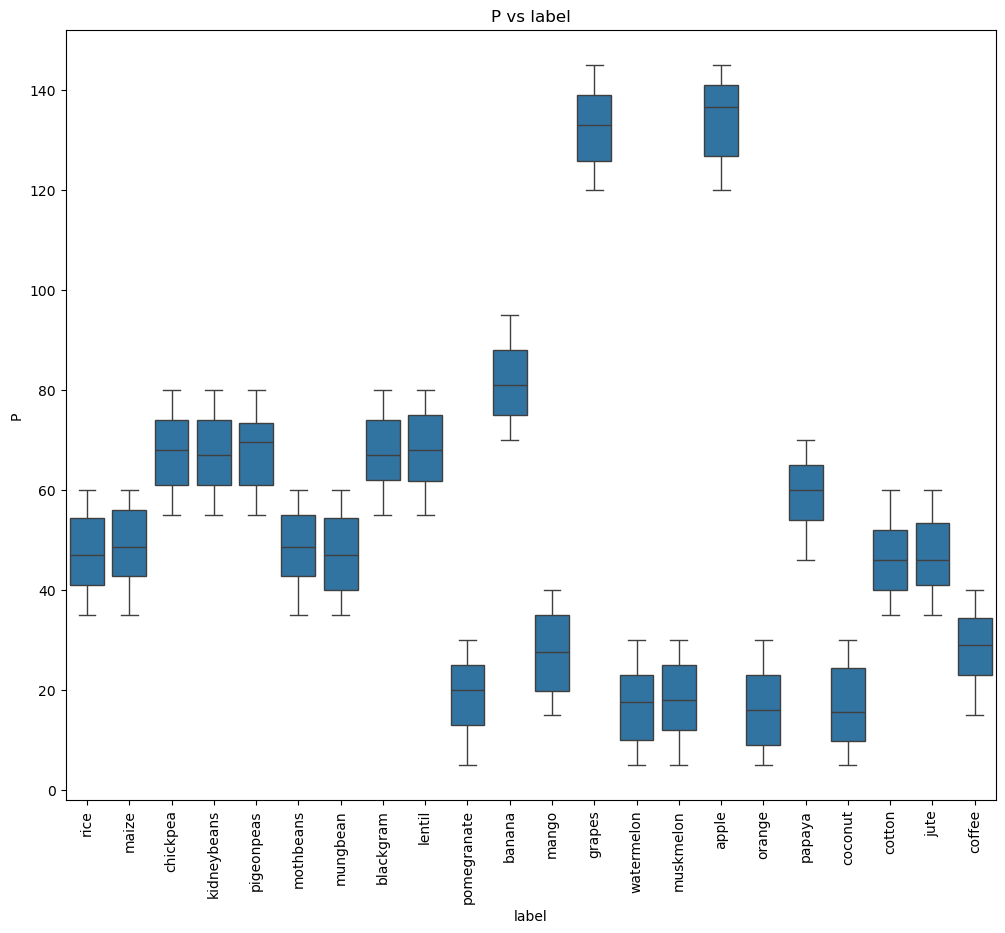

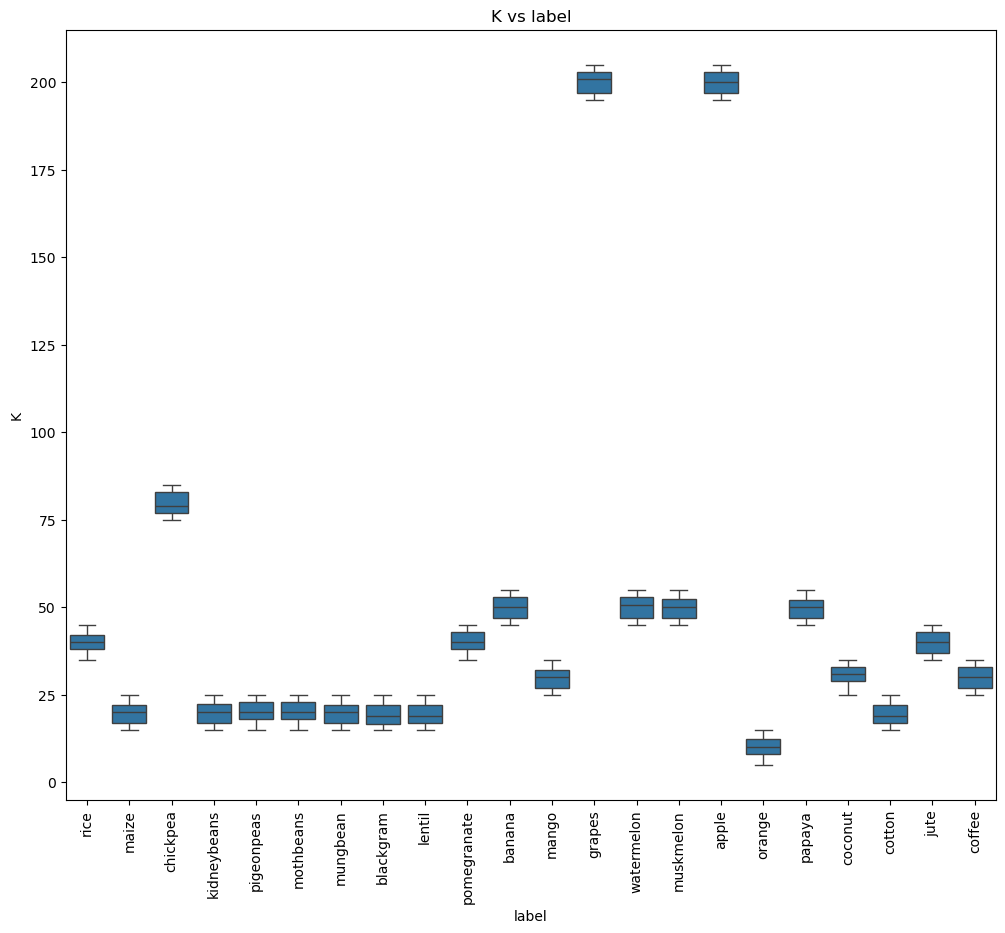

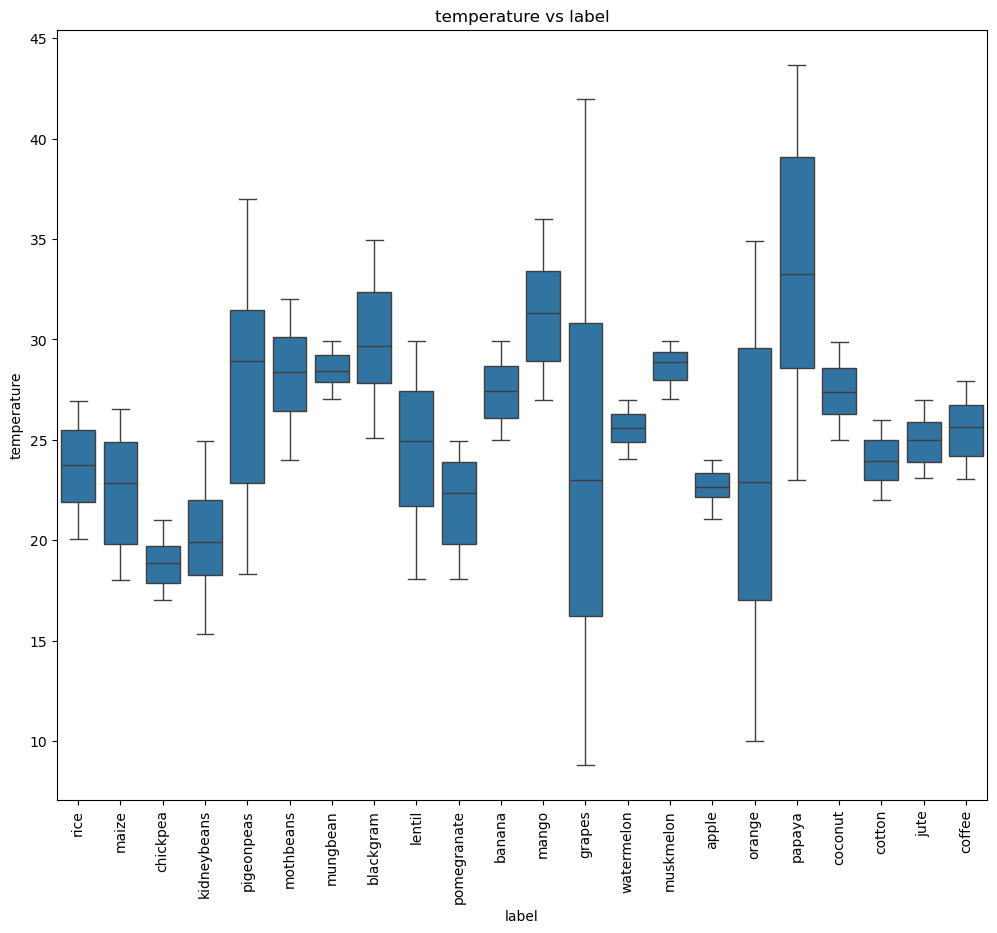

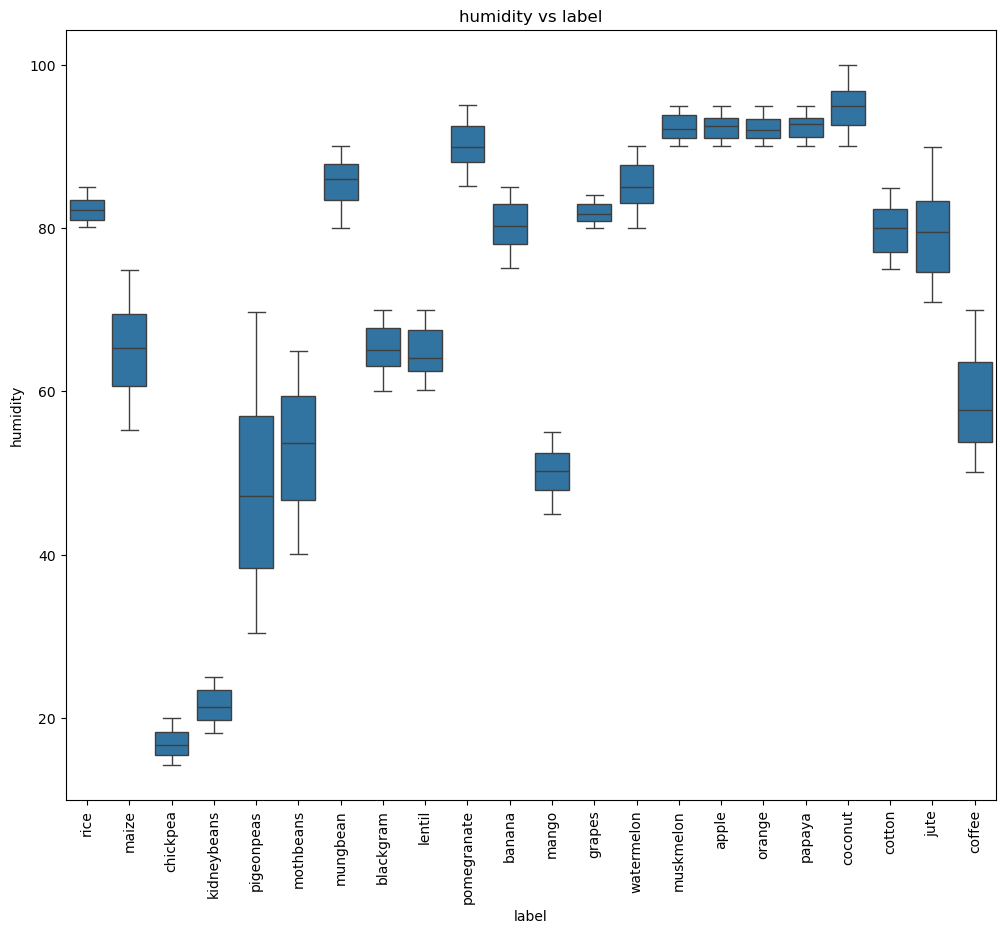

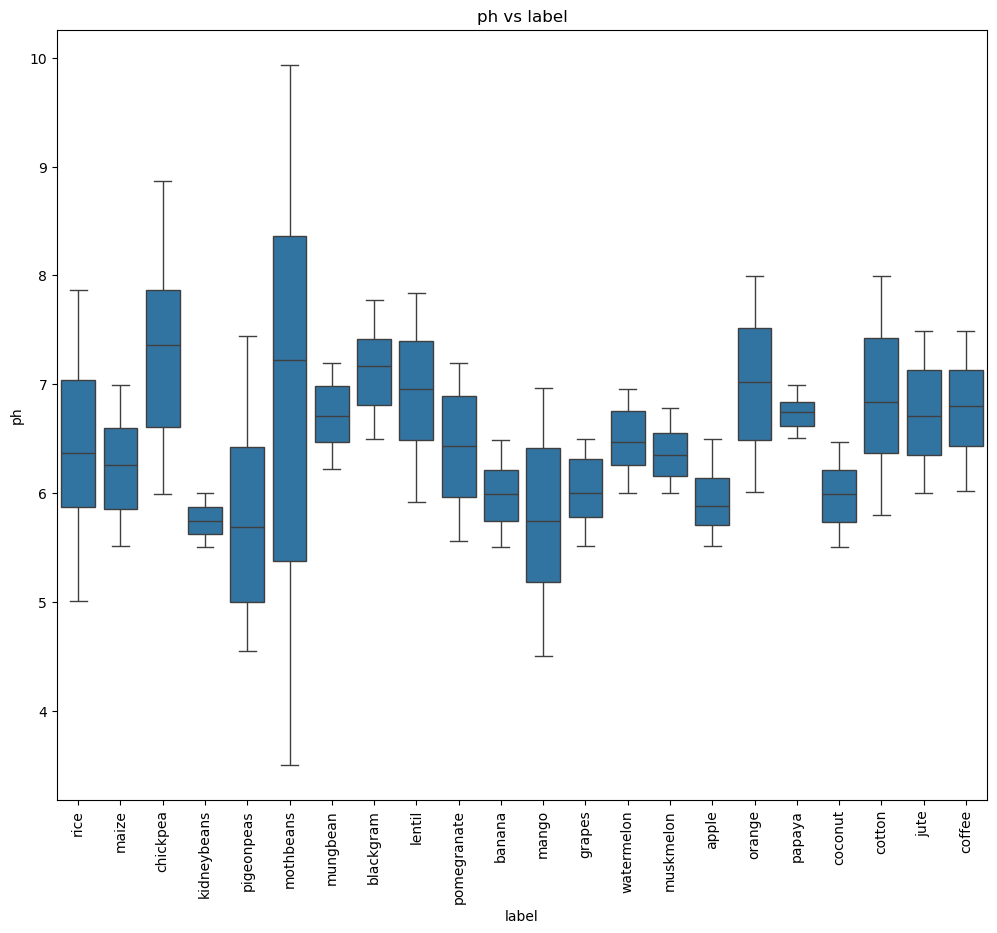

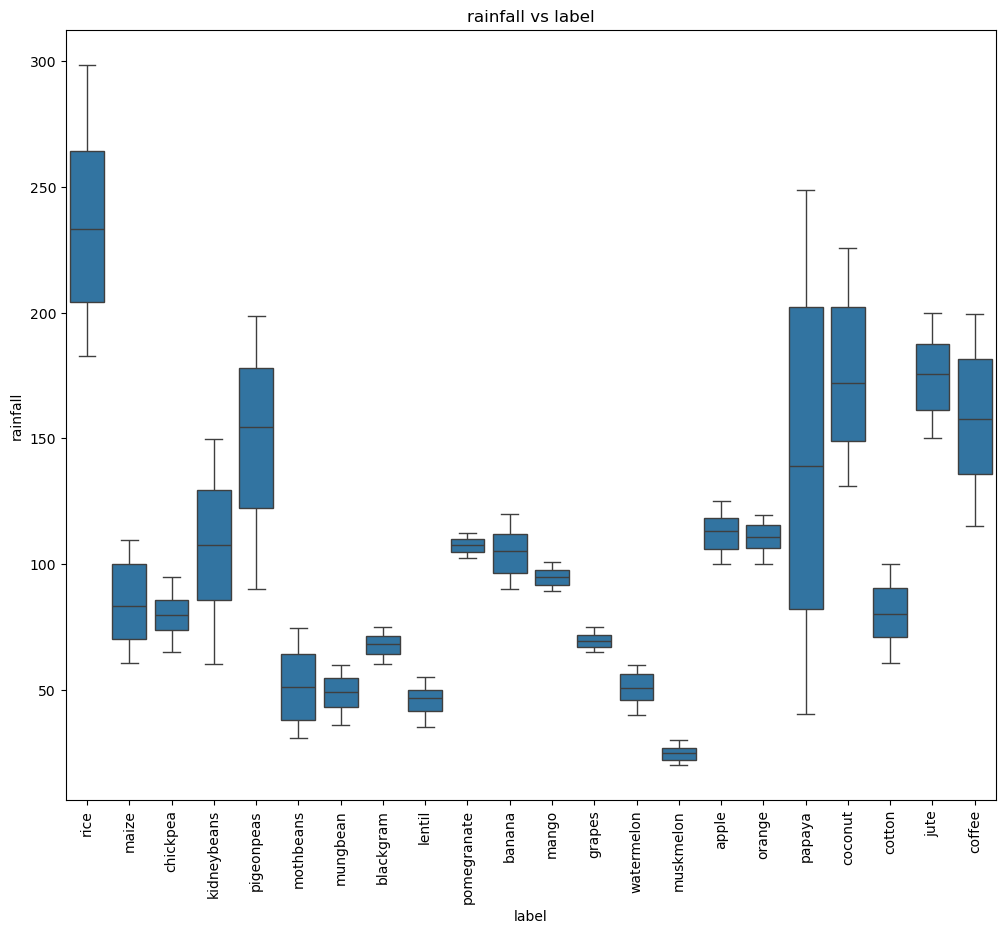

In [53]:
for i in num_cols:
    plt.figure(figsize=(12,10))
    sns.boxplot(data=data,x='label',y=i)
    plt.xticks(rotation=90)
    plt.title(f'{i} vs label')
    plt.show()

In [54]:
data.groupby('label')[num_cols].mean()

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


In [55]:
data.groupby('label')[num_cols].std()

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,11.863704,8.139665,3.320871,0.827404,1.458551,0.268932,7.102985
banana,11.107241,7.690339,3.382591,1.428359,2.805481,0.270650,9.398150
blackgram,12.664258,7.151259,3.188109,2.686357,2.798326,0.372533,4.184186
chickpea,12.150649,7.498545,3.261901,1.169838,1.711979,0.801127,7.944350
coconut,11.761931,8.357244,2.998636,1.385734,2.686329,0.287632,29.472333
coffee,12.345203,7.276113,3.246817,1.502635,5.838566,0.417132,25.695086
cotton,11.628817,7.348634,3.169680,1.135681,3.050955,0.627170,11.231812
grapes,12.466829,7.619029,3.265662,9.738649,1.177111,0.298265,2.951759
jute,10.968274,7.195706,3.313563,1.185138,5.507798,0.446349,15.078367


In [56]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
data['crop_num']=  data['label'].map(crop_dict)

In [57]:
data

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


### Train Test Split

In [58]:
x=data.drop(['label','crop_num'],axis=1)
y=data['crop_num']
x.shape,y.shape

((2200, 7), (2200,))

In [59]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [60]:
y

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: crop_num, Length: 2200, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1760, 7), (440, 7), (1760,), (440,))

### Scale the features using MinMaxScaler

In [63]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

In [64]:
x_train=min_max.fit_transform(x_train)
x_test=min_max.transform(x_test)

In [65]:
x_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]], shape=(1760, 7))

### Training Models

In [66]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
ypred=rfc.predict(x_test)
accuracy_score(y_test,ypred)

0.9931818181818182

### Predictive System

In [67]:
data.columns


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'crop_num'],
      dtype='object')

In [72]:
def recommendation(N,P,k,temperature,humidity,ph,rainfall):
    features=np.array([[N,P,k,temperature,humidity,ph,rainfall]])
    transformed_features=min_max.transform(features)
    prediction=rfc.predict(transformed_features)
    print(prediction)
    return prediction[0]

In [81]:


N = 90
P = 42
k = 43
temperature = 20.80
humidity = 82
ph = 6.5
rainfall = 75

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)

crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                 8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                 14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                 19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}

if predict in crop_dict:
    crop = crop_dict[predict]
    print("{} is a best crop to be cultivated ".format(crop))
else:
    print("Sorry are not able to recommend a proper crop for this environment")

[9]
Muskmelon is a best crop to be cultivated 


In [73]:
import pickle
import os

save_path = r"C:\Users\bobil\Desktop\crop\crop_app\model.pkl"

with open(save_path, "wb") as f:
    pickle.dump((rfc, min_max), f)

print("MODEL SAVED")
print("Location:", save_path)
print("Size:", os.path.getsize(save_path), "bytes")


MODEL SAVED
Location: C:\Users\bobil\Desktop\crop\crop_app\model.pkl
Size: 3613390 bytes


In [75]:
print(type(rfc))


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
